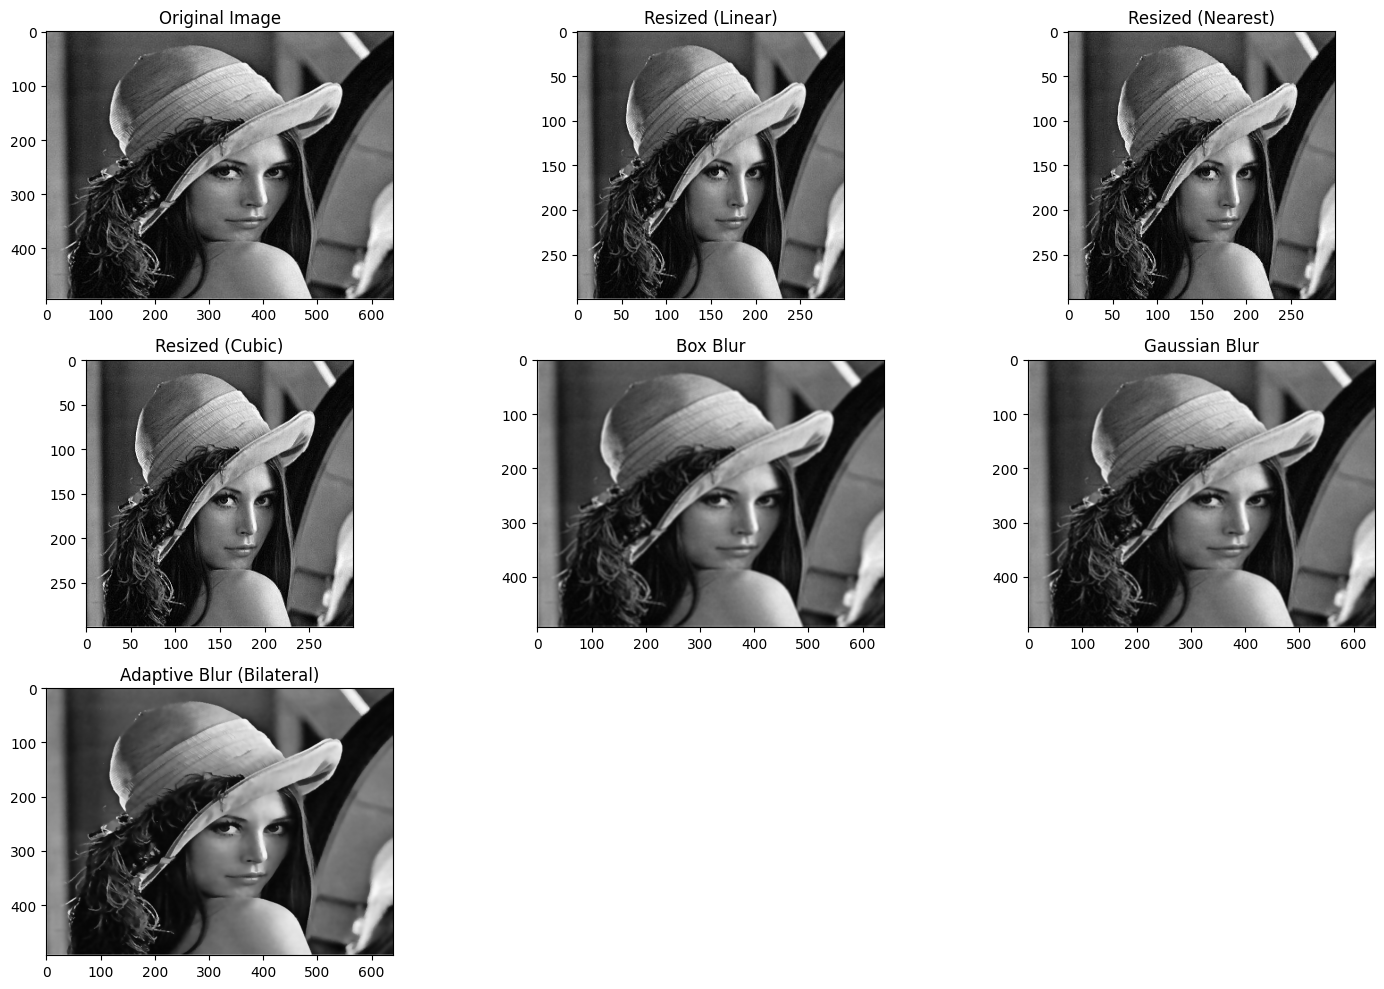

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('Screenshot 2025-01-22 232218.png')
if image is None:
    raise ValueError("Image not found. Please check the path.")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

resized_linear = cv2.resize(image, (300, 300), interpolation=cv2.INTER_LINEAR)
resized_nearest = cv2.resize(image, (300, 300), interpolation=cv2.INTER_NEAREST)
resized_cubic = cv2.resize(image, (300, 300), interpolation=cv2.INTER_CUBIC)

box_blur = cv2.blur(image, (5, 5))  # Box blur
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)  # Gaussian blur
adaptive_blur = cv2.bilateralFilter(image, 9, 75, 75)  # Adaptive blur (bilateral filter)

plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1), plt.imshow(image), plt.title('Original Image')
plt.subplot(3, 3, 2), plt.imshow(resized_linear), plt.title('Resized (Linear)')
plt.subplot(3, 3, 3), plt.imshow(resized_nearest), plt.title('Resized (Nearest)')
plt.subplot(3, 3, 4), plt.imshow(resized_cubic), plt.title('Resized (Cubic)')
plt.subplot(3, 3, 5), plt.imshow(box_blur), plt.title('Box Blur')
plt.subplot(3, 3, 6), plt.imshow(gaussian_blur), plt.title('Gaussian Blur')
plt.subplot(3, 3, 7), plt.imshow(adaptive_blur), plt.title('Adaptive Blur (Bilateral)')
plt.tight_layout()
plt.show()



Evaluating Random Forest

Cross-Validation Results:
Fold 1: Accuracy = 0.9861
Fold 2: Accuracy = 0.9688
Fold 3: Accuracy = 0.9582
Fold 4: Accuracy = 0.9756
Fold 5: Accuracy = 0.9756

Mean CV Accuracy: 0.9729 (±0.0092)

Test Set Metrics:
Accuracy: 0.9722
Precision: 0.9740
Recall: 0.9727
F1 Score: 0.9732

Confusion Matrix:
[[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  1  0  1  0 38]]


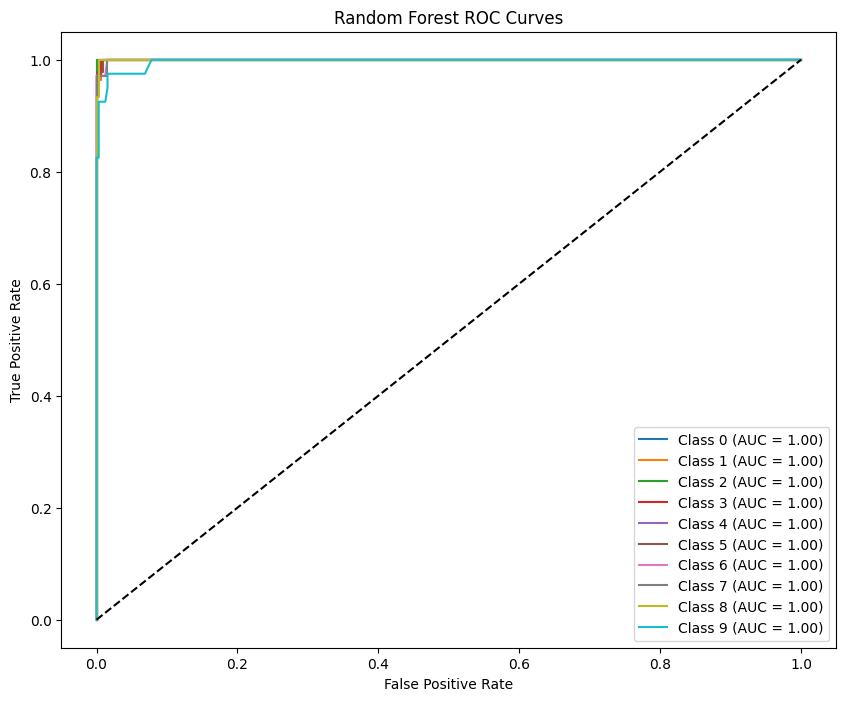


Evaluating SVM

Cross-Validation Results:
Fold 1: Accuracy = 1.0000
Fold 2: Accuracy = 0.9826
Fold 3: Accuracy = 0.9791
Fold 4: Accuracy = 0.9861
Fold 5: Accuracy = 0.9861

Mean CV Accuracy: 0.9868 (±0.0071)

Test Set Metrics:
Accuracy: 0.9861
Precision: 0.9872
Recall: 0.9866
F1 Score: 0.9868

Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 29  1]
 [ 0  0  0  0  0  1  0  1  0 38]]


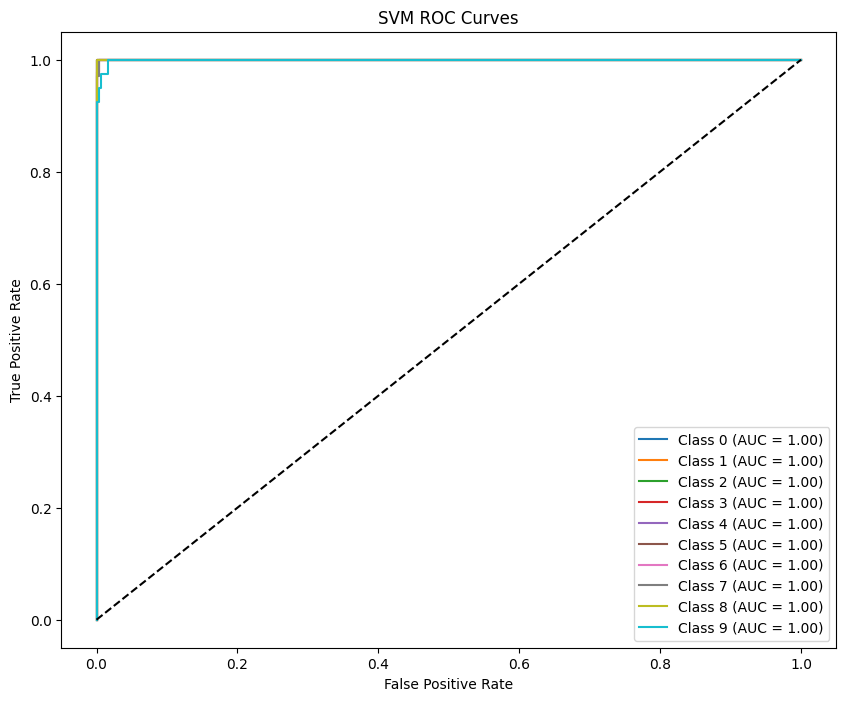

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, roc_curve, auc)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


kf = KFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

# Train and evaluate models
for model_name, model in models.items():
    print(f"\n{'='*40}")
    print(f"Evaluating {model_name}")
    print(f"{'='*40}")
    
    # K-Fold Cross Validation
    print("\nCross-Validation Results:")
    cv_scores = []
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train[train_idx], y_train[val_idx]
        
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_val)
        acc = accuracy_score(y_val, y_pred)
        cv_scores.append(acc)
        print(f"Fold {fold+1}: Accuracy = {acc:.4f}")
    
    print(f"\nMean CV Accuracy: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")
    
    model.fit(X_train, y_train)
    
    #Metrics calculation
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    
    print("\nTest Set Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='macro'):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='macro'):.4f}")
    
    # Confusion Matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    # ROC/AUC
    lb = LabelBinarizer()
    y_test_bin = lb.fit_transform(y_test)
    
    plt.figure(figsize=(10, 8))
    for i in range(10):
        if i in y_test:  # Handle missing classes
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curves')
    plt.legend()
    plt.show()